In [152]:
import os
import numpy as np
import re
import pandas as pd
import random
import nltk
import string
from nltk.tokenize.treebank import TreebankWordTokenizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import WhitespaceTokenizer
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from collections import Counter
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import pickle as pkl
torch.manual_seed(0)

## Load Dataset

In [153]:
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
test_dir = os.path.join(imdb_dir, 'test')

def read_test_train_dir(path,):
    labels = []
    texts = []
    rate=[]
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(train_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname), encoding='utf-8')
                texts.append(f.read())
                f.close()
                rate.append(int(fname[-5]))
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
    return texts,labels,rate

###create training, validation and testing dataset 
train_texts,train_labels,train_rate = read_test_train_dir(train_dir)
test_texts, test_labels,test_rate = read_test_train_dir(test_dir)
X_train, X_val, y_train, y_val = train_test_split(train_texts,train_labels, test_size=0.2, random_state=42)
_,X_test, _, y_test = train_test_split(test_texts, test_labels, test_size=0.4, random_state=42)

## Define Tokenizers

In [9]:
# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

# Example
tokens = tokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'is', 'looking', 'at', 'buying', 'u.k.', 'startup', 'for', '1', 'billion']


In [25]:

# lowercase and remove punctuation
def WordPuncttokenize(sent):
    tokens = WordPunctTokenizer().tokenize(sent)
    return [token.lower() for token in tokens]
# Example
tokens = WordPuncttokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'is', 'looking', 'at', 'buying', 'u', '.', 'k', '.', 'startup', 'for', '$', '1', 'billion']


In [27]:
# lowercase and remove punctuation
def Whitespacetokenize(sent):
    tokens =WhitespaceTokenizer().tokenize(sent)
    return [token.lower() for token in tokens]
# Example
tokens = Whitespacetokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'is', 'looking', 'at', 'buying', 'u.k.', 'startup', 'for', '$1', 'billion']


In [18]:

# lowercase and remove punctuation
def Treebanktokenize(sent):
    tokens = TreebankWordTokenizer().tokenize(sent)
    return [token.lower() for token in tokens]
# Example
tokens = Treebanktokenize(u'Apple is looking at buying U.K. startup for $1 billion')
print (tokens)

['apple', 'is', 'looking', 'at', 'buying', 'u.k.', 'startup', 'for', '$', '1', 'billion']


## Save different tokens

In [19]:


def tokenize_dataset(dataset):
    token_dataset = []
    all_tokens = []
    
    for sample in dataset:
        tokens = Treebanktokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(X_val)
pkl.dump(val_data_tokens, open("val_data_tokens_treebank.pkl", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(X_test)
pkl.dump(test_data_tokens, open("test_data_tokens_treebank.pkl", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(X_train)
pkl.dump(train_data_tokens, open("train_data_tokens_treebank.pkl", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_treebank.pkl", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [28]:
def tokenize_dataset(dataset):
    token_dataset = []
    all_tokens = []
    
    for sample in dataset:
        tokens = WordPuncttokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(X_val)
pkl.dump(val_data_tokens, open("val_data_tokens_WordPunct.pkl", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(X_test)
pkl.dump(test_data_tokens, open("test_data_tokens_WordPunct.pkl", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(X_train)
pkl.dump(train_data_tokens, open("train_data_tokens_WordPunct.pkl", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_WordPunct.pkl", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [29]:
def tokenize_dataset(dataset):
    token_dataset = []
    all_tokens = []
    
    for sample in dataset:
        tokens = Whitespacetokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(X_val)
pkl.dump(val_data_tokens, open("val_data_tokens_Whitespace.pkl", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(X_test)
pkl.dump(test_data_tokens, open("test_data_tokens_Whitespace.pkl", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(X_train)
pkl.dump(train_data_tokens, open("train_data_tokens_Whitespace.pkl", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_Whitespace.pkl", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


## Define N-gram functions

In [154]:
def ngram(sentence,grams=1):
    if grams==1:
        return sentence
    if grams==2:
        return [((sentence[i],sentence[i+1])) for i in range(len(sentence)-1)]+ngram(sentence,1)
    if grams==3:
        return [((sentence[i],sentence[i+1],sentence[i+2])) for i in range(len(sentence)-2)]+ngram(sentence,2)
    if grams==4:
        return [((sentence[i],sentence[i+1],sentence[i+2],sentence[i+3])) for i in range(len(sentence)-3)]+ngram(sentence,3)

In [155]:
def Tokens(scheme='spacy',grams=1):
    if scheme=='spacy':
        train_data_tokens = pkl.load(open("train_data_tokens.pkl", "rb"))
        all_train_tokens = pkl.load(open("all_train_tokens.pkl", "rb"))
        val_data_tokens = pkl.load(open("val_data_tokens.pkl", "rb"))
        test_data_tokens = pkl.load(open("test_data_tokens.pkl", "rb"))
    elif scheme=='treebank':
        train_data_tokens = pkl.load(open("train_data_tokens_treebank.pkl", "rb"))
        all_train_tokens = pkl.load(open("all_train_tokens_treebank.pkl", "rb"))
        val_data_tokens = pkl.load(open("val_data_tokens_treebank.pkl", "rb"))
        test_data_tokens = pkl.load(open("test_data_tokens_treebank.pkl", "rb"))
    elif scheme=='wordpunct':
        train_data_tokens = pkl.load(open("train_data_tokens_WordPunct.pkl", "rb"))
        all_train_tokens = pkl.load(open("all_train_tokens_WordPunct.pkl", "rb"))
        val_data_tokens = pkl.load(open("val_data_tokens_WordPunct.pkl", "rb"))
        test_data_tokens = pkl.load(open("test_data_tokens_WordPunct.pkl", "rb"))
    elif scheme=='whitespace':
        train_data_tokens = pkl.load(open("train_data_tokens_Whitespace.pkl", "rb"))
        all_train_tokens = pkl.load(open("all_train_tokens_Whitespace.pkl", "rb"))
        val_data_tokens = pkl.load(open("val_data_tokens_Whitespace.pkl", "rb"))
        test_data_tokens = pkl.load(open("test_data_tokens_Whitespace.pkl", "rb"))    
    train=[ngram(t, grams) for t in train_data_tokens]
    val=[ngram(t, grams) for t in val_data_tokens]
    test=[ngram(t, grams) for t in test_data_tokens]
    all_t=[j for i in train for j in i]
    return train, val, test, all_t

In [163]:
# First import torch related libraries
class Ngram(nn.Module):

    def __init__(self, vocab_size, emb_dim):

        super(Ngram, self).__init__()
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        out = self.embed(data.long())
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
        out = self.linear(out.float())
        return out

## Hyperparameter Tuning

In [173]:
def tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 
           0.01,num_epochs = 10,optim='Adam',decay=0,vocab_size=10000,save=False):
    train_data_tokens,val_data_tokens,test_data_tokens,all_train_tokens=Tokens(scheme,grams)
    max_vocab_size = vocab_size
    PAD_IDX = 0
    UNK_IDX = 1
    
    def build_vocab(all_tokens):
        token_counter = Counter(all_tokens)
        vocab, count = zip(*token_counter.most_common(max_vocab_size))
        id2token = list(vocab)
        token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
        id2token = ['<pad>', '<unk>'] + id2token
        token2id['<pad>'] = PAD_IDX 
        token2id['<unk>'] = UNK_IDX
        return token2id, id2token

    token2id, id2token = build_vocab(all_train_tokens)
    random_token_id = random.randint(0, len(id2token)-1)
    random_token = id2token[random_token_id]
    
    def token2index_dataset(tokens_data):
        indices_data = []
        for tokens in tokens_data:
            index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
            indices_data.append(index_list)
        return indices_data

    train_data_indices = token2index_dataset(train_data_tokens)
    val_data_indices = token2index_dataset(val_data_tokens)
    test_data_indices = token2index_dataset(test_data_tokens)

    MAX_SENTENCE_LENGTH = 250

    class NewsGroupDataset(Dataset):

        def __init__(self, data_list, target_list):
            self.data_list = data_list
            self.target_list = target_list
            assert (len(self.data_list) == len(self.target_list))

        def __len__(self):
            return len(self.data_list)

        def __getitem__(self, key):
            token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
            label = self.target_list[key]
            return [token_idx, len(token_idx), label]

    def newsgroup_collate_func(batch):
        data_list = []
        label_list = []
        length_list = []
        for datum in batch:
            label_list.append(datum[2])
            length_list.append(datum[1])
        # padding
        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

    BATCH_SIZE = 32
    train_dataset = NewsGroupDataset(train_data_indices, y_train)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    val_dataset = NewsGroupDataset(val_data_indices, y_val)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_data_indices,y_test)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    model = Ngram(len(id2token), emb_dim)
    va_acc=[]
    tr_acc=[]
    
    criterion = torch.nn.CrossEntropyLoss()  
    if optim=='Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=decay)
    elif optim=='SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay=decay)
        
    def test_model(loader, model):
        """
        Help function that tests the model's performance on a dataset
        @param: loader - data loader for the dataset to test against
        """
        correct = 0
        total = 0
        model.eval()
        for data, lengths, labels in loader:
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = F.softmax(model(data_batch, length_batch), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]
            total += labels.size(0)
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
        return (100 * correct / total)

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
        val_acc = test_model(val_loader, model)
        tra_acc= test_model(train_loader, model)
        va_acc.append(val_acc)
        tr_acc.append(tra_acc)
    if save:
        return tr_acc,va_acc,model,test_loader,id2token
    else:
        return tr_acc,va_acc

In [49]:
tr_acc,va_acc=tuning(scheme='whitespace',grams=1,emb_dim = 100,learning_rate = 0.01,num_epochs = 10)
print(va_acc[-1])
##whitespace 

85.46


In [59]:
tr_acc,va_acc=tuning(scheme='treebank',grams=1,emb_dim = 100,learning_rate = 0.01,num_epochs = 10)
print(va_acc[-1])
##treebank

85.7


In [69]:
tr_acc,va_acc=tuning(scheme='wordpunct',grams=1,emb_dim = 100,learning_rate = 0.01,num_epochs = 10)
print(va_acc[-1])
##WordPunct

86.58


In [49]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.01,num_epochs = 10)
print(va_acc[-1])

86.64


In [49]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.01,num_epochs = 10,vocab_size=20000)
print(va_acc[-1])

86.64


In [50]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.01,num_epochs = 10,optim='SGD')
print(va_acc[-1])

65.18


In [55]:
tr_acc,va_acc=tuning(scheme='spacy',grams=2,emb_dim = 100,learning_rate = 0.01,num_epochs = 10)
print(va_acc[-1])

83.1


In [54]:
tr_acc,va_acc=tuning(scheme='spacy',grams=2,emb_dim = 100,learning_rate = 0.01,num_epochs = 10,vocab_size=20000)
print(va_acc[-1])

84.58


In [56]:
tr_acc,va_acc=tuning(scheme='spacy',grams=2,emb_dim = 100,learning_rate = 0.01,num_epochs = 10,vocab_size=30000)
print(va_acc[-1])

85.02


In [57]:
tr_acc,va_acc=tuning(scheme='spacy',grams=2,emb_dim = 100,learning_rate = 0.01,num_epochs = 10,vocab_size=50000)
print(va_acc[-1])

85.36


In [38]:
tr_acc,va_acc=tuning(scheme='spacy',grams=3,emb_dim = 100,learning_rate = 0.01,num_epochs = 10,vocab_size=30000)
print(va_acc[-1])

77.78


In [39]:
tr_acc,va_acc=tuning(scheme='spacy',grams=3,emb_dim = 100,learning_rate = 0.01,num_epochs = 10)
print(va_acc[-1])

74.26


In [52]:
tr_acc,va_acc=tuning(scheme='spacy',grams=4,emb_dim = 100,learning_rate = 0.01,num_epochs = 10)
print(va_acc[-1])

63.26


In [154]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.001,num_epochs = 10)
print(va_acc[-1])

86.92


In [160]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.0001,num_epochs = 50)
print(va_acc[-1])

86.72


In [25]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.0001,num_epochs = 10)
print(va_acc[-1])

73.54


In [26]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.001,num_epochs = 20)
print(va_acc[-1])

87.0


In [27]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.001,num_epochs = 30)
print(va_acc[-1])

86.94


In [29]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 50,learning_rate = 0.001,num_epochs = 20)
print(va_acc[-1])

86.88


In [164]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 100,learning_rate = 0.001,num_epochs = 20)
print(va_acc[-1])

87.04


In [166]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 150,learning_rate = 0.001,num_epochs = 20)
print(va_acc[-1])

86.9


In [168]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 80,learning_rate = 0.001,num_epochs = 20)
print(va_acc[-1])

87.12


In [170]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 70,learning_rate = 0.001,num_epochs = 20)
print(va_acc[-1])

86.92


In [171]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 90,learning_rate = 0.001,num_epochs = 20)
print(va_acc[-1])

86.98


In [31]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 80,learning_rate = 0.001,num_epochs = 20,optim='Adam',decay=0.1)
print(va_acc[-1])

59.12


In [32]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 80,learning_rate = 0.001,num_epochs = 20,optim='Adam',decay=0.01)
print(va_acc[-1])

61.0


In [20]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 80,learning_rate = 0.001,num_epochs = 20,optim='Adam',decay=1)
print(va_acc[-1])

56.58


In [21]:
tr_acc,va_acc=tuning(scheme='spacy',grams=1,emb_dim = 80,learning_rate = 0.001,num_epochs = 20,optim='Adam',decay=10)
print(va_acc[-1])

55.28


## Plotting and Evaluating

In [175]:
tr_acc,va_acc,model,test_loader,id2token=tuning(scheme='spacy',grams=1,emb_dim = 80,learning_rate = 0.001,num_epochs = 15,optim='Adam',decay=0,save=True)
print(va_acc)

[79.54, 84.14, 85.96, 86.96, 87.48, 87.78, 88.04, 87.76, 87.44, 87.24, 87.24, 87.0, 86.6, 86.18, 86.24]


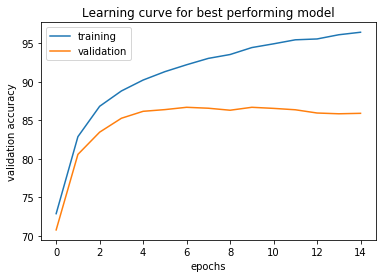

In [104]:
import matplotlib.pyplot as plt
plt.plot(tr_acc,label='training')
plt.plot(va_acc,label='validation')
# plt.plot(ts_acc,label='testing')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.title('Learning curve for best performing model')
plt.show()

In [176]:
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]

        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)
test_model(test_loader, model)

92.21

In [198]:
model.eval()
i=0
for data, lengths, labels in test_loader:
    data_batch, length_batch, label_batch = data, lengths, labels
    outputs = F.softmax(model(data_batch, length_batch), dim=1)
    predicted = outputs.max(1, keepdim=True)[1]
    for j in range(len(outputs)):
        if predicted[j].eq(labels[j].view_as(predicted[j])).sum().item()==1:
            i+=1
            print(' '.join([id2token[i.item()] for i in data_batch[j]]))
            print('target: ', labels[j].item())
            print('predicted: ', predicted[j].item())
        if i==5:
            break
    if i==5:
        break

silent night deadly night 5 is the very last of the series and like part 4 it 's unrelated to the first three except by title and the fact that it 's a christmas themed horror flick.<br /><br <unk> to the oblivious there 's some obvious things going on here ... mickey rooney plays a <unk> named joe <unk> and his creepy son 's name is <unk> ring a bell anyone now a little boy named derek heard a knock at the door one evening and opened it to find a present on the <unk> for him even though it said do n't open till christmas he begins to open it anyway but is stopped by his dad who <unk> him and sends him to bed and opens the gift himself inside is a little red ball that <unk> santa arms and a head and proceeds to kill dad <unk> maybe he should have left well enough alone of course derek is then traumatized by the incident since he watched it from the stairs but he does n't grow up to be some killer santa he just stops <unk> /><br />there 's a mysterious stranger lurking around who seems 

In [136]:
model.eval()
i=0
for data, lengths, labels in test_loader:
    data_batch, length_batch, label_batch = data, lengths, labels
    outputs = F.softmax(model(data_batch, length_batch), dim=1)
    predicted = outputs.max(1, keepdim=True)[1]
    for j in range(len(outputs)):
        if predicted[j].eq(labels[j].view_as(predicted[j])).sum().item()!=1:
            i+=1
            print(' '.join([id2token[i.item()] for i in data_batch[j]]))
            print('target: ', labels[j].item())
            print('predicted: ', predicted[j].item())
        if i==5:
            break
    if i==5:
        break

was this based on a comic book a video game a drawing by a 3 year old br /><br />there is nothing in this movie to be taken seriously at all not the characters not the dialog not the plot not the action nothing we have high tech international terrorists criminals who <unk> like pre school kids stallone 's man of steel type <unk> towards ice cold weather dialog so dumb that it 's sometimes almost hilarious and so on even the <unk> that the bad guys use is dumb tango tango a film that entertains through some suspense good action sequences and a nice snowy <unk> setting oh yes and the unintentional <unk> /><br />the film opens with some truly bad and unconvincing gay banter between our go lucky and happy characters who are obviously having a <unk> time then comes a sweat inducing failed rescue part which should make anyone with fear of heights problems want to pull their hair out and then we have some more bad dialog and after that some more great action this is the rhythm of the film in 